#### Importing necessary libraries
- Pandas is the library used for the data manipulation and analysis
- Numpy is the library that provides a range of tools and functions that make it easy to perform mathematical operations
- Seaborn is a data visualisation library. It is built on top of the Matplotlib library.
- Matplotlib is a data visualisation library. It is used as the foundation for many other higher-level plotting libraries, such as Seaborn.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the csv file
The CSV file is read and placed in a dataframe named **df**.

In [28]:
df = pd.read_csv("/Users/anna-alexandradanchenko/Documents/University/PF/ICA2/resources/covid-data.csv")

#### Renaming the columns

The columns are renamed to more readable name. As we use limited number of columns from the dataset, we are okay with renaming only one.

In [29]:
df.rename({"location": "country"}, axis=1, inplace=True)

#### Creating new columns
The "Month" Column will help 

In [30]:
df['Month'] = pd.to_datetime(df['date']).dt.to_period('M')


#### Handling missing data
Firstly, we should delete the rows where the "continent" value is missing. In our dataset, if the continent is not determined, the country is not valid (for example: "World", "Asia", etc.)

In [31]:
df = df.dropna(axis=0, subset=['continent'])

We can also delete the rows in column "iso_code" that start with "OWID". They are not valid countries, as they don't have valid iso_code. For example: "Wales", "Scotland", etc.


In [32]:
df = df[~df["iso_code"].astype(str).str.startswith('OWID')]

For some small islands in Oceania we don't have any data. We also don't have any data for such countries as Turkmenistan, North Korea, etc. Let's delete them. It can be done using for cycle. 

In [33]:
locations_todrop = ["Turkmenistan", "Tuvalu", "North Korea", "Niue", "Nauru", "Tonga", "Micronesia", "Marshall Islands",
                    "Anguilla", "Jersey", "Guam", "Guernsey", "United States Virgin Islands", "Sint Maarten (Dutch part)",
                    "Falkland Islands", "Northern Mariana Islands"]
for location in locations_todrop:
    df = df[~df["country"].astype(str).str.startswith(location)]

#### Optimizing dataset by leaving only necessary columns
Defining variable in which we store columns that we need and then leaving only selected columns. 

In [34]:
to_leave = ["country", "new_cases", "new_deaths", "date", "Month", "continent"]
df = df[to_leave]  # Leaving only selected columns.

#### Checking the percentage of missing data in the columns
Firstly, let's determine the number of NaNs in "new cases" and "new deaths" columns.

Then, let's determine the percent of NaNs in both columns

In [35]:
def nans_percent_check():
    nans_cases = df['new_cases'].isnull().sum()
    nans_deaths = df['new_deaths'].isnull().sum()
    rows_number = len(df.index)
    nans_percent_cases = nans_cases / rows_number * 100
    nans_percent_deaths = nans_deaths / rows_number * 100
    return(print(nans_percent_cases, nans_percent_deaths))
nans_percent_check()

1.2125971354379947 8.909722456412505


Let's plot the sum of Nans grouped by column "New cases" in "New deaths" column. 
We can see

In [36]:
df["nans_deaths"] = df['new_deaths'].isnull()
df2 = df.groupby(["new_cases"])[["nans_deaths"]].sum()
df2 = df2.reset_index(drop=False)

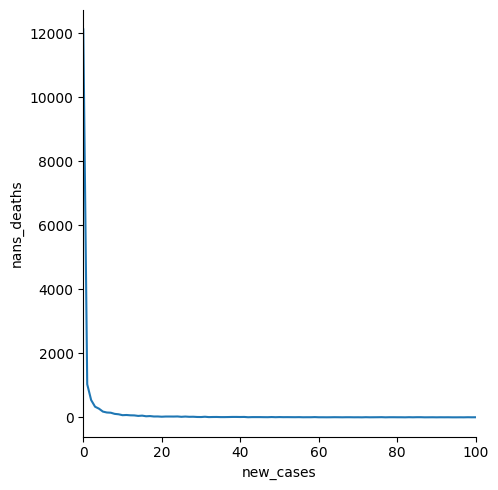

In [38]:
ax = sns.relplot(x = 'new_cases', y = 'nans_deaths', kind = 'line', data = df2)
ax.set(xlim=(0, 100))


In [39]:
cases_low = df[df["new_cases"] < 10.0]
cases_low["new_deaths"] = cases_low["new_deaths"].replace(np.nan, 0)

df.update(cases_low)

/var/folders/6p/1jmnvrkx7jxdslfr99shm1z00000gn/T/ipykernel_30794/4208968323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_low["new_deaths"] = cases_low["new_deaths"].replace(np.nan, 0)
/var/folders/6p/1jmnvrkx7jxdslfr99shm1z00000gn/T/ipykernel_30794/4208968323.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.update(cases_low)


In [40]:
nans_percent_check()

1.2125971354379947 1.6929147135197113


Let's remove "nans_deaths" column. We don't need it anymore

In [41]:
df = df.drop("nans_deaths", axis = 1)

#### Converting columns to suitable type

In [43]:
df["date"] = pd.to_datetime(df["date"])
df["country"] = df["country"].astype(str)
df["continent"] = df["continent"].astype(str)

df2['Month'] = df2['Month'].astype(str)
df2['Month'] = pd.to_datetime(df2['Month'])

Outputting the dataframe information in order to examine datatypes. As you can see, the dtypes of "Country" and "continent" columns are still "object". That is because dtype of string, dict, list is always object. 

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207571 entries, 0 to 237476
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   country     207571 non-null  object        
 1   new_cases   205054 non-null  float64       
 2   new_deaths  204057 non-null  float64       
 3   date        207571 non-null  datetime64[ns]
 4   Month       207571 non-null  period[M]     
 5   continent   207571 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2), period[M](1)
memory usage: 11.1+ MB
None


Now, let's get the 10 random rows to have more global perspective

In [45]:
print(df.sample(10)) 

             country  new_cases  new_deaths       date    Month      continent
85307        Grenada        0.0         0.0 2022-11-09  2022-11  North America
50660           Cuba      115.0         0.0 2020-12-21  2020-12  North America
195500       Somalia        0.0         0.0 2021-10-31  2021-10         Africa
126353         Macao        0.0         0.0 2021-02-02  2021-02           Asia
104878         Italy        0.0         0.0 2020-02-01  2020-02         Europe
150988   New Zealand    10323.0         0.0 2022-07-20  2022-07        Oceania
169366   Philippines     5036.0        94.0 2021-07-12  2021-07           Asia
38437     Cape Verde       39.0         0.0 2021-07-29  2021-07         Africa
140543      Mongolia        0.0         0.0 2022-10-22  2022-10           Asia
190237  Sierra Leone        9.0         0.0 2022-02-08  2022-02         Africa


#### Exporting cleaned data
Exporting tidy dataset into a new file.

In [46]:
df.to_csv("data-cleaned.csv")